In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [49]:
digits = load_digits()

X = digits.data     
y = digits.target 
images = digits.images 

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1797, 64)
y shape: (1797,)


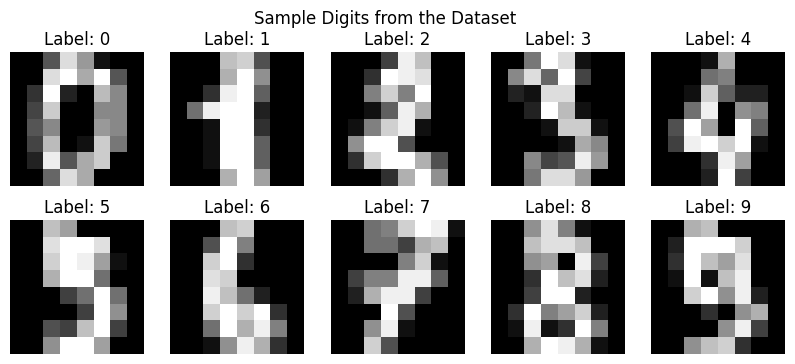

In [50]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.suptitle("Sample Digits from the Dataset")
plt.show()


In [51]:
print("First image as vector:\n", X[0])
print("Min pixel value:", X.min())
print("Max pixel value:", X.max())

First image as vector:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Min pixel value: 0.0
Max pixel value: 16.0


---
---

In [52]:
def normalize_data(X):
    return X / 16.0

In [53]:
def encode_labels(y):
    encoder = OneHotEncoder(sparse_output=False)
    return encoder.fit_transform(y.reshape(-1, 1))

In [54]:
def split_data(X, y, test_size=0.2, val_size=0.5):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


In [55]:
def run_ann(X_train, y_train, X_val, y_val, hidden_layers=1, neurons_per_layer=64, learning_rate=0.001, epochs=30, batch_size=32):
    model = Sequential()

    model.add(Dense(neurons_per_layer, activation='relu', input_dim=X_train.shape[1]))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)

    return model



In [56]:
def evaluate(model, X, y, dataset_name="Validation"):
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print(f"{dataset_name} Accuracy: {accuracy:.4f}")
    return accuracy


---
---

In [57]:
X = normalize_data(X)
y = encode_labels(y)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)


In [58]:
model1= run_ann(X_train, y_train, X_val, y_val, hidden_layers=1, neurons_per_layer=32)
train_acc1 = evaluate(model1, X_train, y_train, "TRAIN 1 layer(s) X 32 neurons")
val_acc1 = evaluate(model1, X_val, y_val, "1 layer(s) X 32 neurons")

model2 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=1, neurons_per_layer=64)
train_acc2 = evaluate(model2, X_train, y_train, "TRAIN 1 layer(s) X 64 neurons")
acc2 = evaluate(model2, X_val, y_val, "1 layer(s) X 64 neurons")

model3 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=1, neurons_per_layer=128)
train_acc3 = evaluate(model3, X_train, y_train, "TRAIN 1 layer(s) X 128 neurons")
acc3 = evaluate(model3, X_val, y_val, "1 layer(s) X 128 neurons")

model4 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=1, neurons_per_layer=192)
train_acc4 = evaluate(model4, X_train, y_train, "TRAIN 1 layer(s) X 192 neurons")
acc4 = evaluate(model4, X_val, y_val, "1 layer(s) X 192 neurons")

model5 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=2, neurons_per_layer=32)
train_acc5 = evaluate(model5, X_train, y_train, "TRAIN 2 layer(s) X 32 neurons")
acc5 = evaluate(model5, X_val, y_val, "2 layers(s) X 32 neurons")

model6 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=2, neurons_per_layer=64)
train_acc6 = evaluate(model6, X_train, y_train, "TRAIN 2 layer(s) X 64 neurons")
acc6 = evaluate(model6, X_val, y_val, "2 layers(s) X 64 neurons")

model7 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=2, neurons_per_layer=128)
train_acc7 = evaluate(model7, X_train, y_train, "TRAIN 2 layer(s) X 128 neurons")
acc6 = evaluate(model7, X_val, y_val, "2 layers(s) X 128 neurons")

model8 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=3, neurons_per_layer=32)
train_acc8 = evaluate(model8, X_train, y_train, "TRAIN 3 layer(s) X 32 neurons")
acc6 = evaluate(model8, X_val, y_val, "3 layers(s) X 32 neurons")

model9 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=3, neurons_per_layer=64)
train_acc9 = evaluate(model9, X_train, y_train, "TRAIN 3 layer(s) X 64 neurons")
acc6 = evaluate(model9, X_val, y_val, "3 layers(s) X 64 neurons")

model10 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=3, neurons_per_layer=128)
train_acc10 = evaluate(model10, X_train, y_train, "TRAIN 3 layer(s) X 128 neurons")
acc6 = evaluate(model10, X_val, y_val, "3 layers(s) X 128 neurons")

model11 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=4, neurons_per_layer=32)
train_acc11 = evaluate(model11, X_train, y_train, "TRAIN 4 layer(s) X 32 neurons")
acc6 = evaluate(model10, X_val, y_val, "4 layers(s) X 32 neurons")

model12 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=4, neurons_per_layer=64)
train_acc12 = evaluate(model12, X_train, y_train, "TRAIN 4 layer(s) X 64 neurons")
acc6 = evaluate(model10, X_val, y_val, "4 layers(s) X 64 neurons")

model13 = run_ann(X_train, y_train, X_val, y_val, hidden_layers=4, neurons_per_layer=128)
train_acc13 = evaluate(model13, X_train, y_train, "TRAIN 4 layer(s) X 128 neurons")
acc6 = evaluate(model10, X_val, y_val, "4 layers(s) X 32 neurons")


c:\Users\cazal\OneDrive\Documents\FACULTATE\ANUL III\Erasmus Latvia\Uni\Machine Learning\Assignment7\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TRAIN 1 layer(s) X 32 neurons Accuracy: 0.9833
1 layer(s) X 32 neurons Accuracy: 0.9444
TRAIN 1 layer(s) X 64 neurons Accuracy: 0.9889
1 layer(s) X 64 neurons Accuracy: 0.9611
TRAIN 1 layer(s) X 128 neurons Accuracy: 0.9951
1 layer(s) X 128 neurons Accuracy: 0.9722
TRAIN 1 layer(s) X 192 neurons Accuracy: 0.9951
1 layer(s) X 192 neurons Accuracy: 0.9667
TRAIN 2 layer(s) X 32 neurons Accuracy: 0.9889
2 layers(s) X 32 neurons Accuracy: 0.9556
TRAIN 2 layer(s) X 64 neurons Accuracy: 0.9979
2 layers(s) X 64 neurons Accuracy: 0.9833
TRAIN 2 layer(s) X 128 neurons Accuracy: 1.0000
2 layers(s) X 128 neurons Accuracy: 0.9722
TRAIN 3 layer(s) X 32 neurons Accuracy: 0.9944
3 layers(s) X 32 neurons Accuracy: 0.9500
TRAIN 3 layer(s) X 64 neurons Accuracy: 1.0000
3 layers(s) X 64 neurons Accuracy: 0.9722
TRAIN 3 layer(s) X 128 neurons Accuracy: 1.0000
3 layers(s) X 128 neurons Accuracy: 0.9667
TRAIN 4 layer(s) X 32 neurons Accuracy: 0.9986
4 layers(s) X 32 neurons Accuracy: 0.9667
TRAIN 4 layer(s) 

In [60]:
best_model = model6
test_acc = evaluate(best_model, X_test, y_test, "Test Set")


Test Set Accuracy: 0.9778


**Observation:** 

I experimented with ANNs of 1 to 3 hidden layers and between 32 and 192 neurons per layer. I used ReLU activations for hidden layers and softmax for the output, with the Adam optimizer at a learning rate of 0.001. Training was done on the training set and evaluated on the validation set.

I observed that increasing the number of neurons generally improved accuracy, with 1–2 layers giving the best results. Adding more layers or too many neurons could lead to overfitting, especially since the dataset is small. Accuracy also depends slightly on the random train/validation/test split, which explains small fluctuations between models.